In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

dataset = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Billionaire.csv")
# dataset.to_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Python\Kaggle\Billionaires Analysis with Python\dataset\Billionaire.csv", index=None, header=True)

display(dataset.head())

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [93]:
print("Shape of dataset = %d Baris & %d Kolom"%dataset.shape)
print("Informasi dataset : ")
display(dataset.info())
print("Cek Missing Value : ")
display(dataset.isnull().sum())

Shape of dataset = 2755 Baris & 7 Kolom
Informasi dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


None

Cek Missing Value : 


Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [94]:
dataset = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Billionaire.csv")

print("Imputasi Missing value dengan Median")

print("Shape of dataset = %d Baris & %d Kolom"%dataset.shape)

modus_value_age = dataset["Age"].mode()[0]
dataset["Age"] = dataset["Age"].fillna(modus_value_age)


print("Cek Missing Value : ")
display(dataset.isnull().sum())

print("Shape of dataset = %d Baris & %d Kolom"%dataset.shape)

Imputasi Missing value dengan Median
Shape of dataset = 2755 Baris & 7 Kolom
Cek Missing Value : 


Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

Shape of dataset = 2755 Baris & 7 Kolom


In [95]:
print("Statistik Dasar : ")
display(dataset.describe())

Statistik Dasar : 


,Rank,Age
count,2755.000000,2755.000000
mean,1345.663521,62.938294
std,772.669811,13.290147
min,1.000000,18.000000
25%,680.000000,54.000000
50%,1362.000000,62.000000
75%,2035.000000,72.000000
max,2674.000000,99.000000


In [96]:
dataset = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Billionaire.csv")

modus_value_age = dataset["Age"].mode()[0]
dataset["Age"] = dataset["Age"].fillna(modus_value_age)

dataset["NetWorth"] = dataset["NetWorth"].str.strip("$ B")
dataset["NetWorth"] = dataset["NetWorth"].astype("float64")
display(dataset.head())

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,Technology
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,124.0,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,Technology


In [97]:
print("Statistik Dasar : ")
display(dataset.describe())

Statistik Dasar : 


,NetWorth,Rank,Age
count,2755.000000,2755.000000,2755.000000
mean,4.749220,1345.663521,62.938294
std,9.615358,772.669811,13.290147
min,1.000000,1.000000,18.000000
25%,1.500000,680.000000,54.000000
50%,2.300000,1362.000000,62.000000
75%,4.200000,2035.000000,72.000000
max,177.000000,2674.000000,99.000000


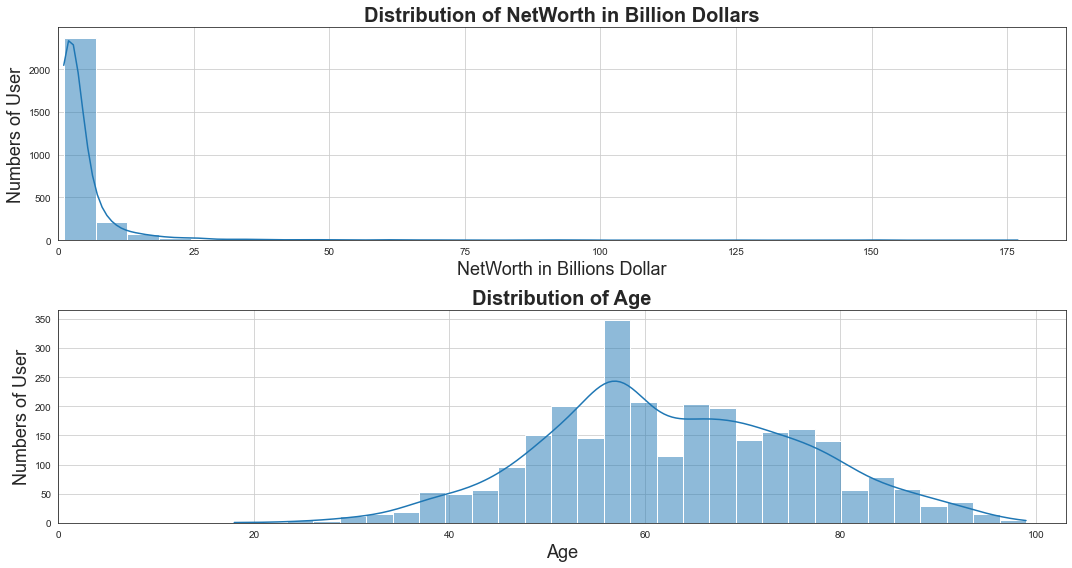

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

numerical_columns = dataset.columns[dataset.dtypes == "float64"].to_list()

fig, axs = plt.subplots(len(numerical_columns), 1, figsize=(15, 8))
for i, column in enumerate(numerical_columns):
    sns.histplot(data=dataset, x=column, kde=True, ax=axs[i], bins=30)
    axs[i].set_xlim(0)
    if column == "NetWorth":
        axs[i].set_title("Distribution of {} in Billion Dollars".format(column), fontsize=20, fontweight="bold")
        axs[i].set_xlabel("{} in Billions Dollar".format(column), fontsize=18)
    else:
        axs[i].set_title("Distribution of {}".format(column), fontsize=20, fontweight="bold")
        axs[i].set_xlabel("{}".format(column), fontsize=18)
    axs[i].set_ylabel("Numbers of User", fontsize=18)
    axs[i].grid()
plt.tight_layout()
plt.show()

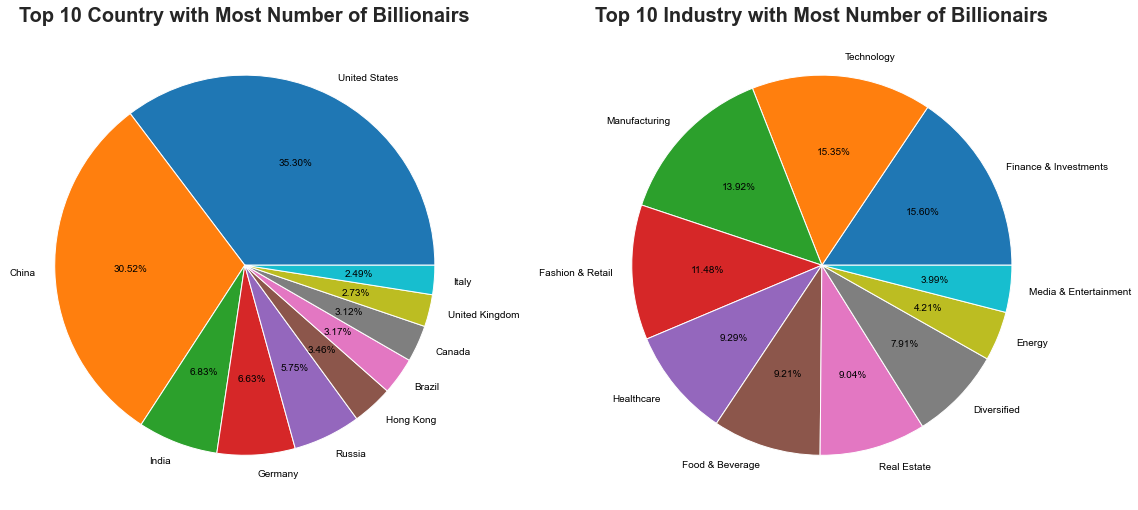

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style("dark")

country_industry = ["Country", "Industry"]
fig, axs = plt.subplots(1, 2, figsize=(16, 13))
for i, column in enumerate(country_industry):
    value = dataset[column].value_counts().head(10).values
    index = dataset[column].value_counts().head(10).index
    axs[i].pie(value, labels=index, autopct="%.2f%%", textprops={"color": "black"})
    axs[i].set_title("Top 10 {} with Most Number of Billionairs".format(column), fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

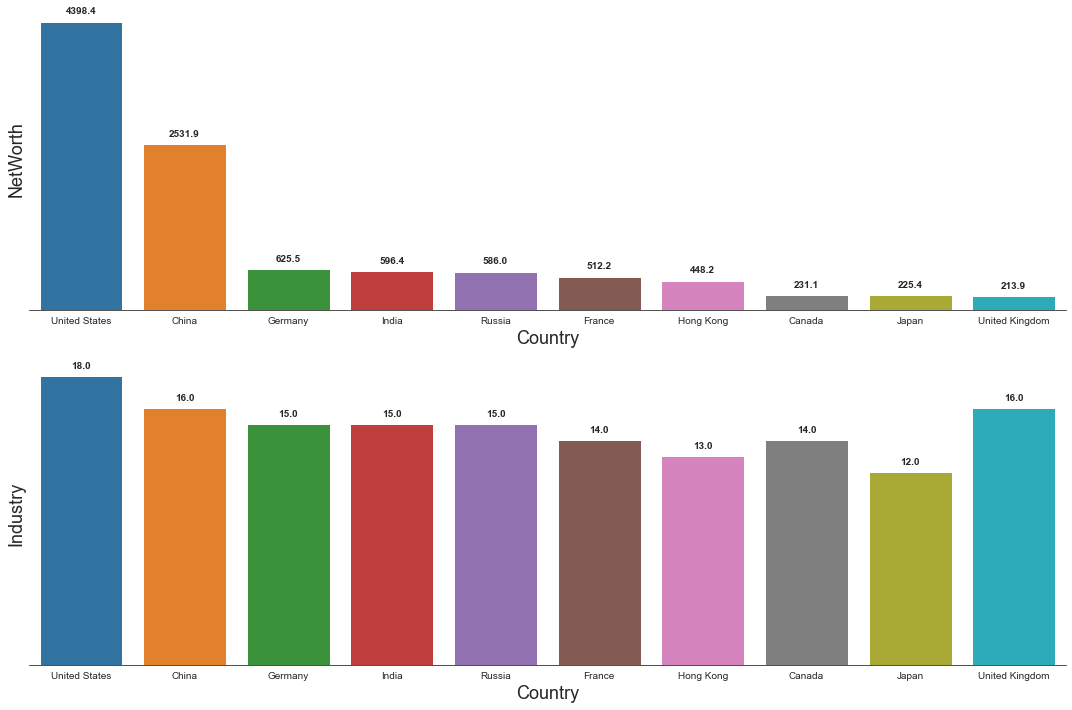

In [127]:
import matplotlib.ticker as ticker

df_country = dataset.groupby(["Country"]).agg({
                                                "NetWorth" : "sum",
                                                "Industry" : "nunique"
                                             }).reset_index().sort_values(by="NetWorth", ascending=False).head(10)

sns.set_style("white")
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
for i, column in enumerate(["NetWorth","Industry"]):
   sns.barplot(data=df_country, x="Country", y=column, ax=axs[i])
   axs[i].set_xlabel("Country", fontsize=18)
   axs[i].set_ylabel(column, fontsize=18)
   axs[i].yaxis.set_major_locator(ticker.NullLocator())
   for p in axs[i].patches:
      height = p.get_height()
      width = p.get_width()
      x = p.get_x()
      y= p.get_y()
      axs[i].annotate(
                        height,
                        xy=(x + width/2 , height),
                        weight="bold",
                        ha="center",
                        va="center",
                        xytext=(0, 10),
                        textcoords="offset points"
                     )
sns.despine(left=True, top=True, right=True)
plt.tight_layout()
plt.show()